In [40]:
# import data related libraries
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# import modelling libraries, and statistical libraries
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA as ARIMA
from statsmodels import api as sm

In [22]:
# Read the data

df = pd.read_csv(r'C:\Users\Saloni Deshmukh\Task1\Crypto\BTC-USD.csv')

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3623,2024-08-18,59468.132813,60262.718750,58445.402344,58483.964844,58483.964844,17740625837
3624,2024-08-19,58480.710938,59612.660156,57864.710938,59493.453125,59493.453125,25911207712
3625,2024-08-20,59493.453125,61396.328125,58610.882813,59012.792969,59012.792969,31613400008
3626,2024-08-21,59014.988281,61834.351563,58823.445313,61175.191406,61175.191406,32731154072


In [24]:
df.shape

(3628, 7)

In [25]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


Exploratory Data Analysis

In [26]:
# Describe the dataframe and its basic statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3628.0,1.751103e+04,1.937358e+04,1.768970e+02,1.119805e+03,9.075579e+03,2.875553e+04,7.307938e+04
High,3628.0,1.791042e+04,1.980995e+04,2.117310e+02,1.158675e+03,9.246727e+03,2.927017e+04,7.375007e+04
Low,3628.0,1.708429e+04,1.889414e+04,1.715100e+02,1.100305e+03,8.827901e+03,2.824264e+04,7.133409e+04
Close,3628.0,1.752654e+04,1.938299e+04,1.781030e+02,1.123720e+03,9.080262e+03,2.881685e+04,7.308350e+04
Adj Close,3628.0,1.752654e+04,1.938299e+04,1.781030e+02,1.123720e+03,9.080262e+03,2.881685e+04,7.308350e+04
Volume,3628.0,1.753250e+10,1.920375e+10,5.914570e+06,2.767047e+08,1.369498e+10,2.837758e+10,3.509679e+11


In [27]:
# Checking null values

df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 0, 'Year')

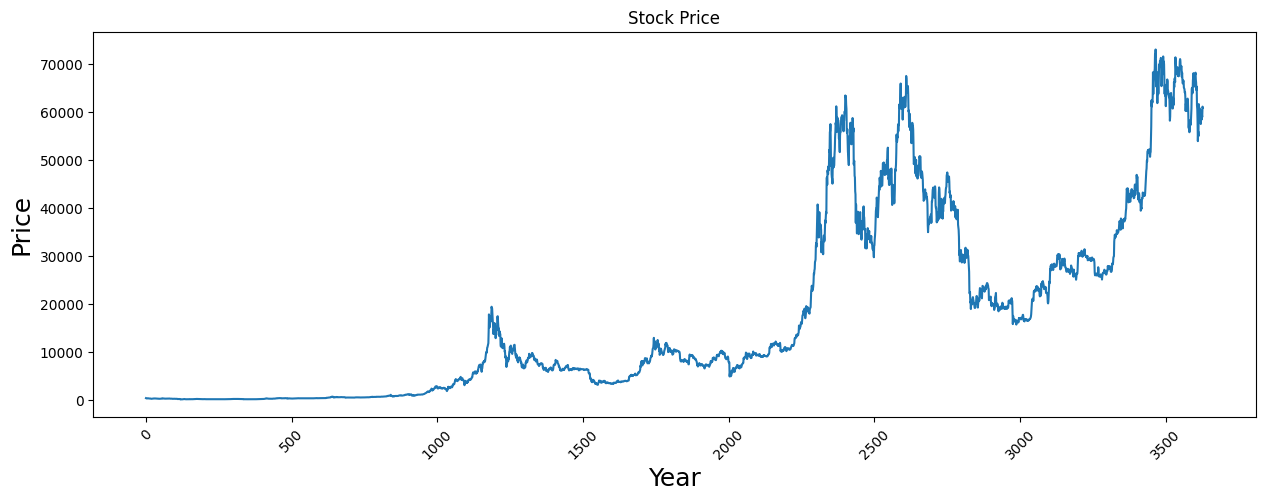

In [28]:
# Plotting using matplotlib

plt.figure(figsize=(15, 5))
plt.xticks(rotation = 45)
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price', fontsize=18)
plt.xlabel('Year', fontsize=18)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

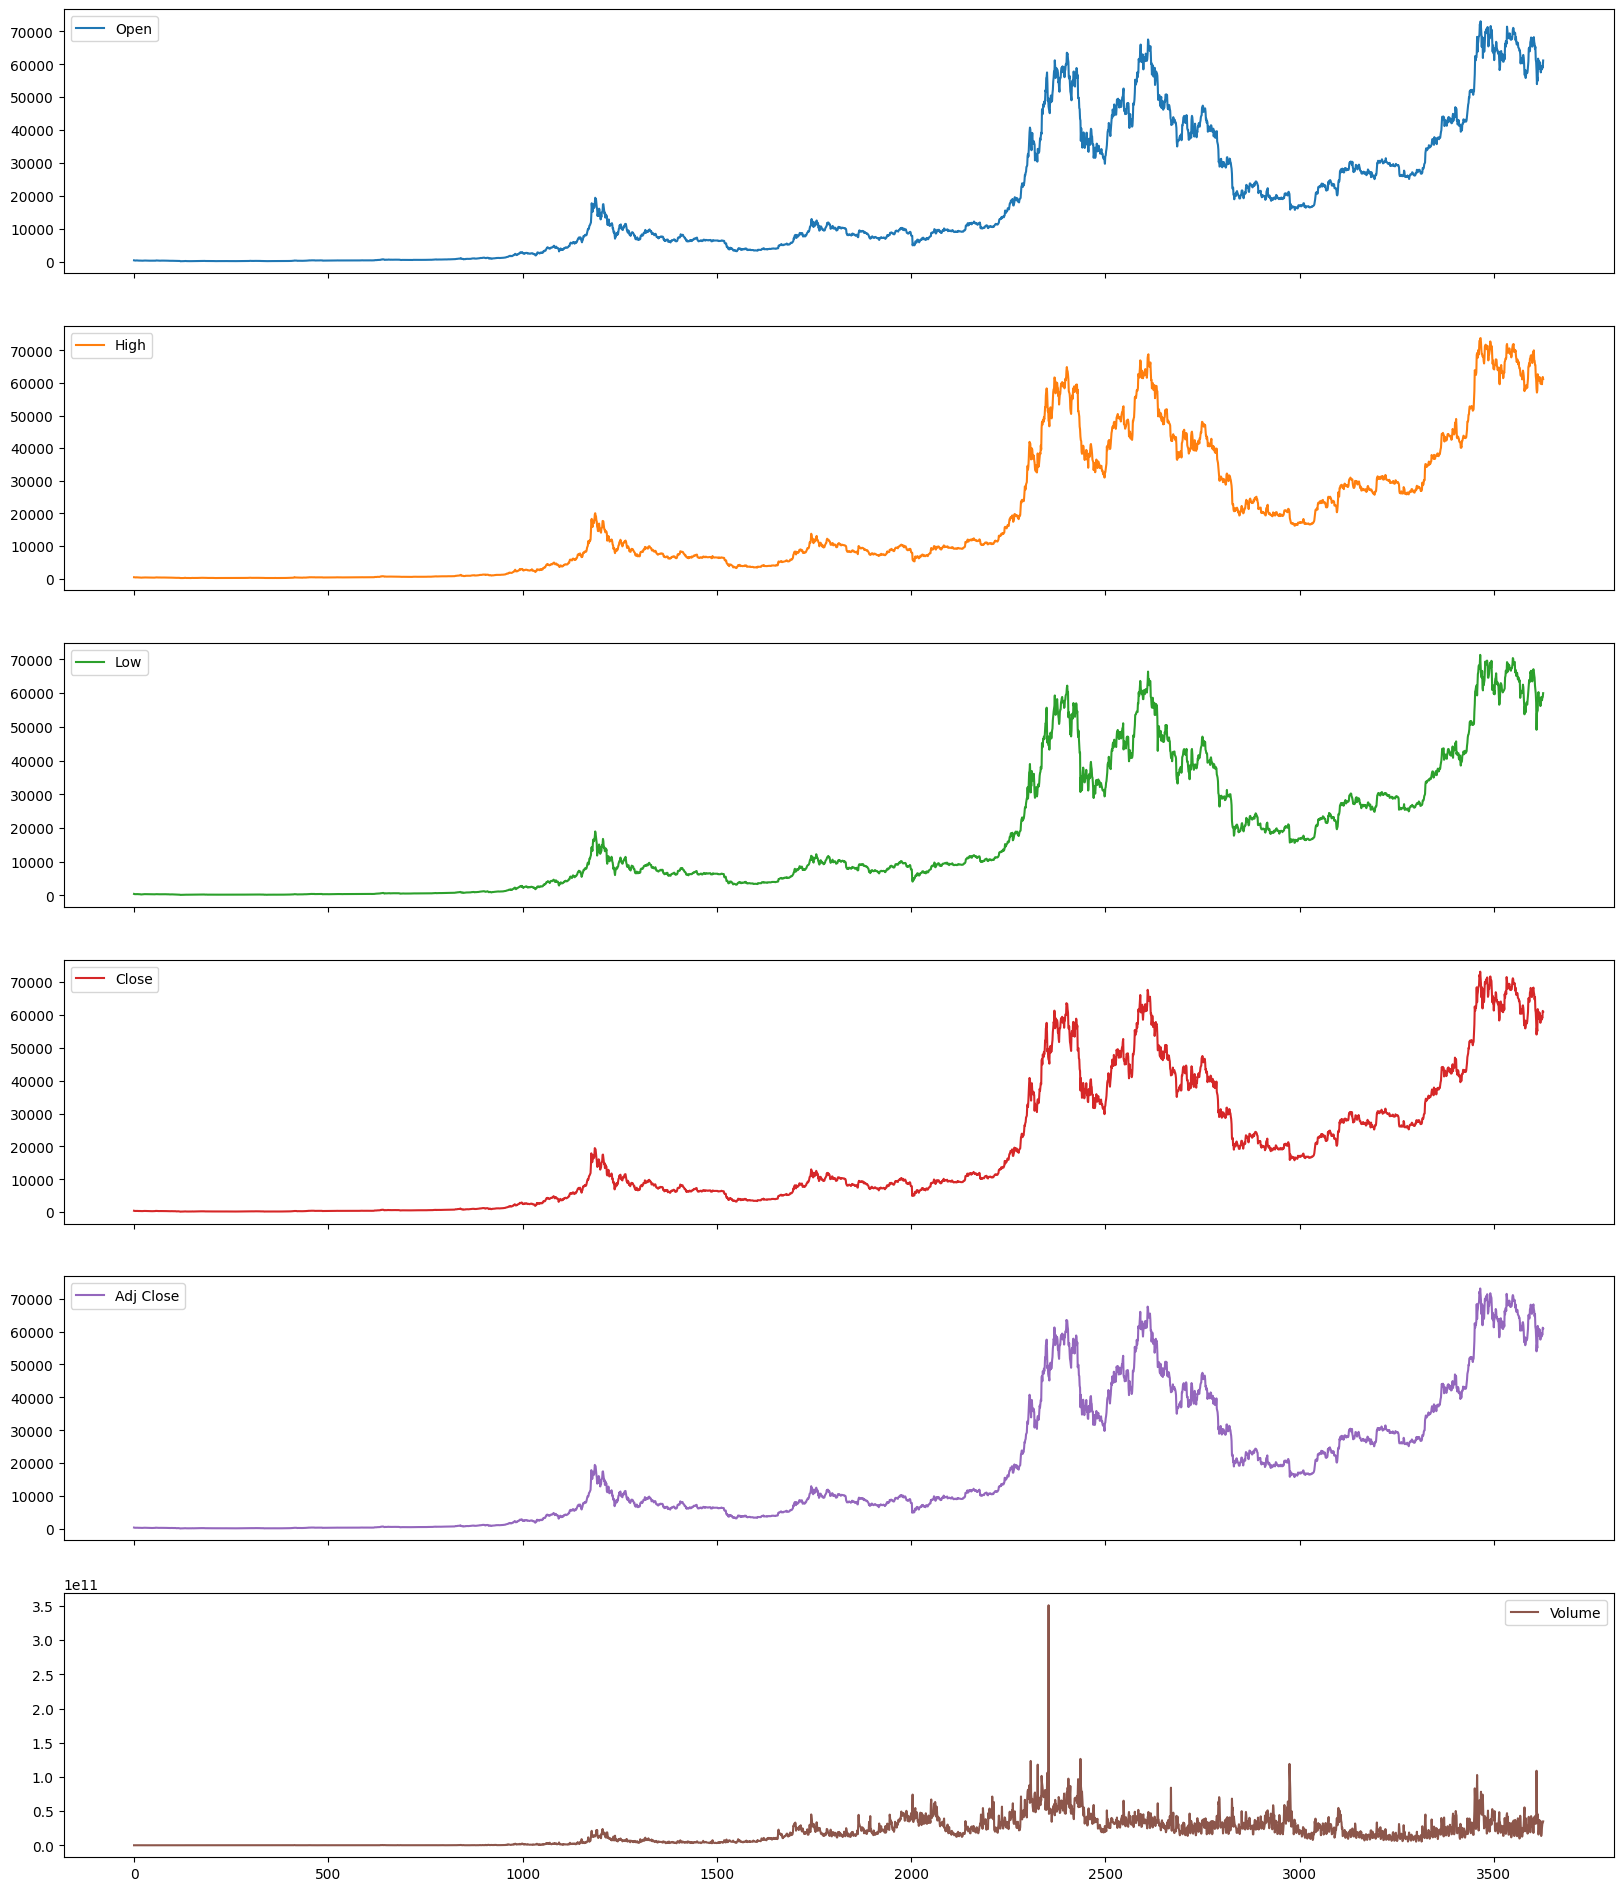

In [29]:
# Plotting all columns

df.plot(subplots=True)

ANALYSING THE STOCK VIA BOX PLOTS

In [30]:
# create new columns for plotting purposes

futures, target = df.drop(columns=['Close', 'Date', 'Volume'], axis = 1), df['Close']

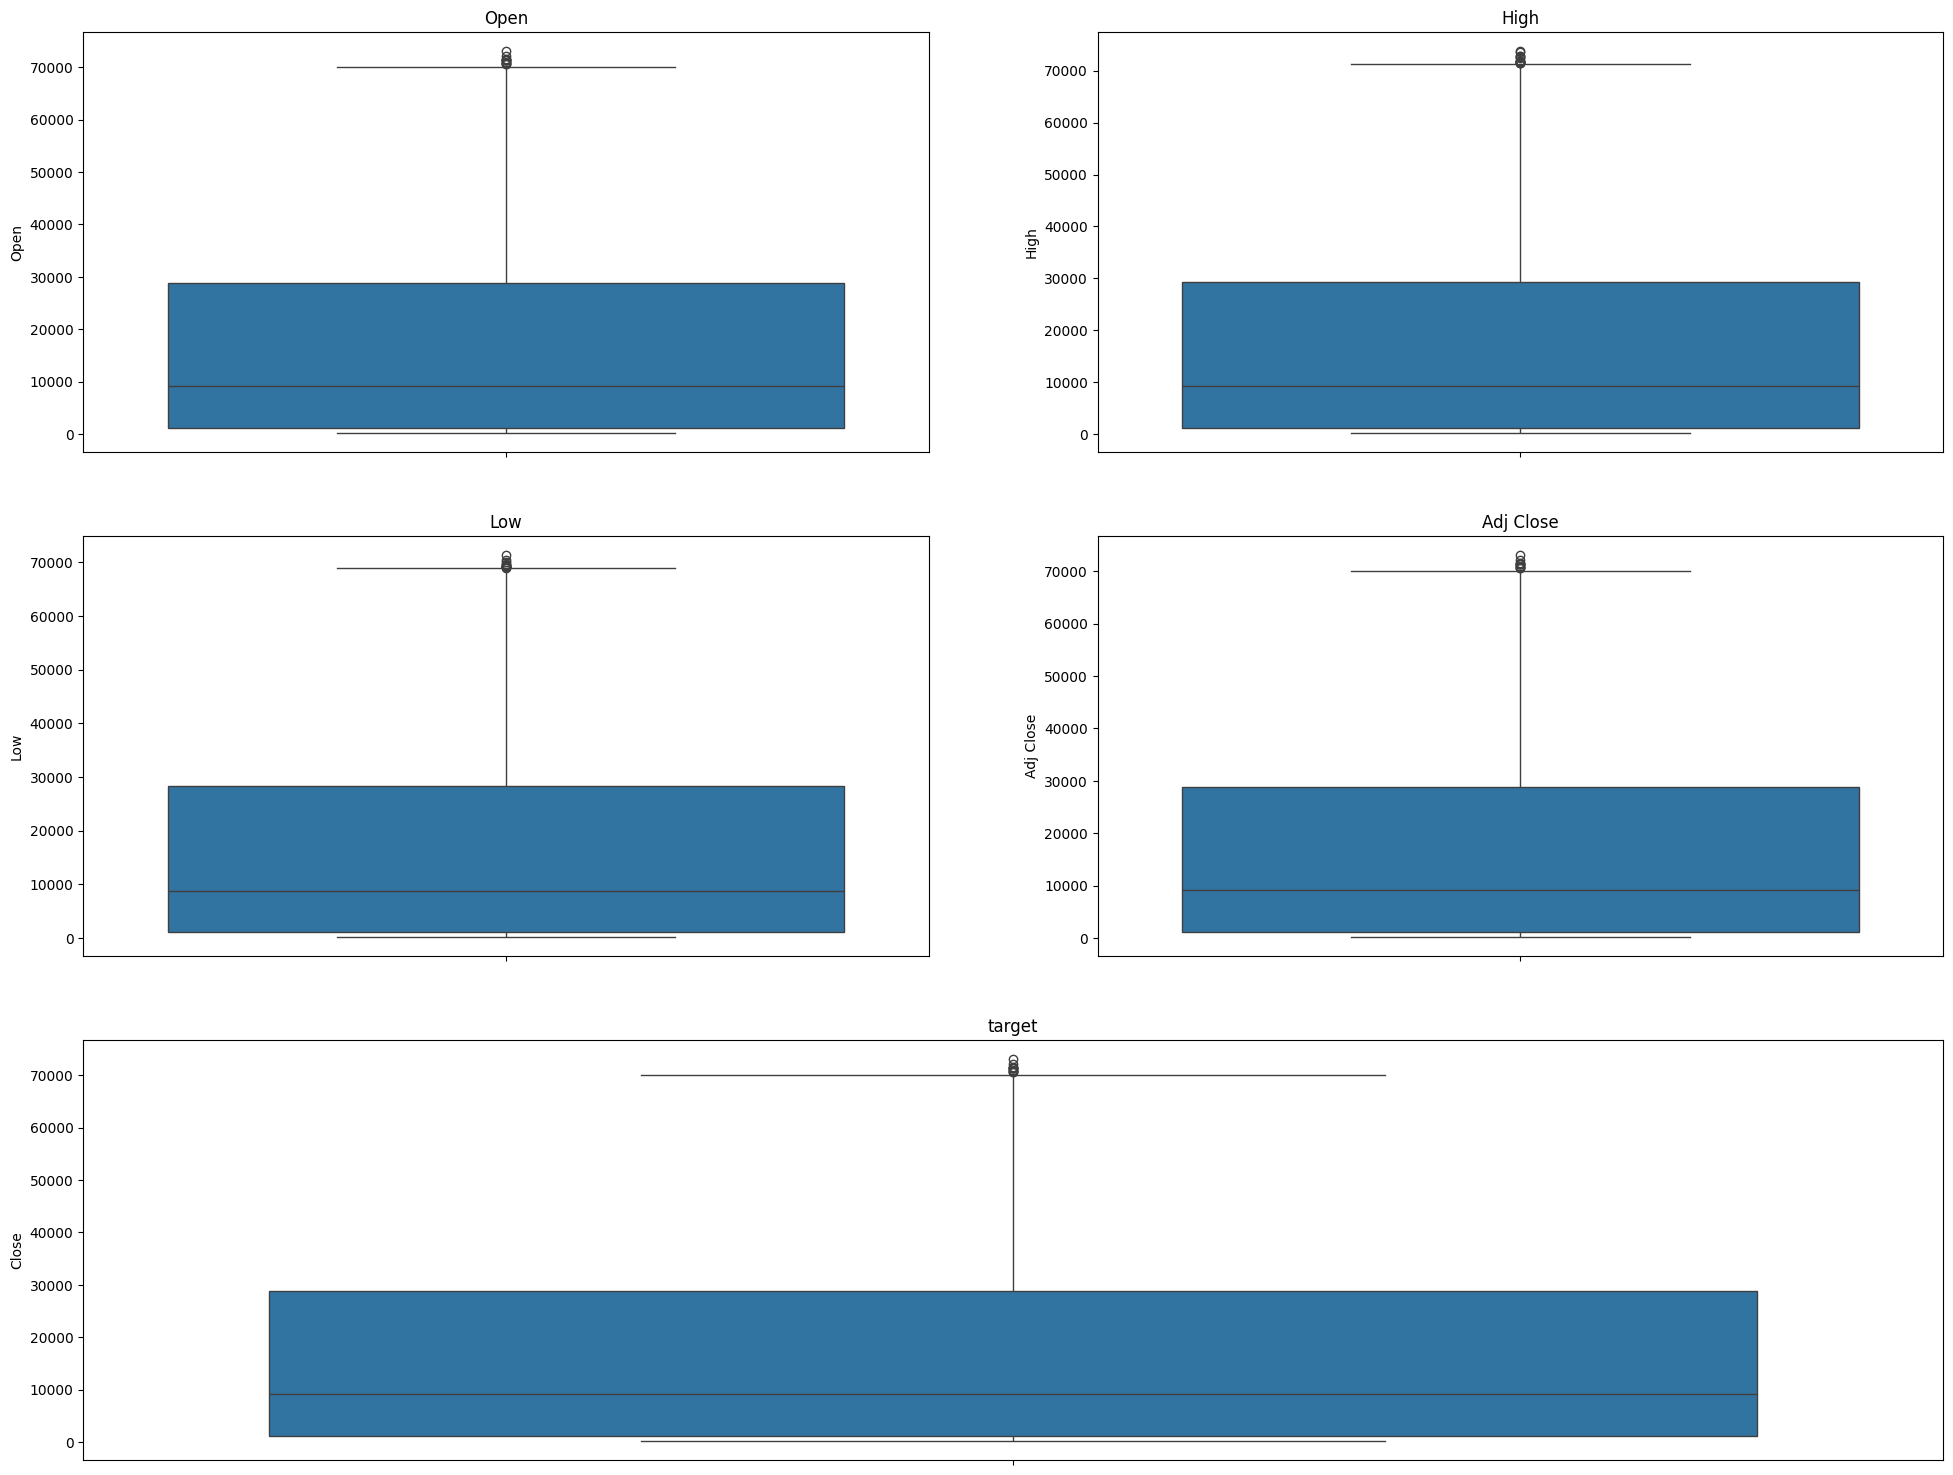

In [32]:
# Plot grid to analyse these columns
# 3x2 grid

nrows, ncols = 3, 2
fig = plt.figure(figsize=(24, 12))

spec = GridSpec(ncols=ncols, nrows=nrows, figure=fig, top=1.3)
my_id = 0
for i in range(nrows):
    for j in range(ncols):
      if i == nrows-1:
        ax = fig.add_subplot(spec[i, :])
        sns.boxplot(target)
        ax.set_title('target')
        break
      ax = fig.add_subplot(spec[i, j])
      sns.boxplot(futures.iloc[:, my_id])
      ax.set_title(futures.columns[my_id])
      my_id += 1

ANALYSING MEAN, MEDIAN & MODE GRAPHICALLY

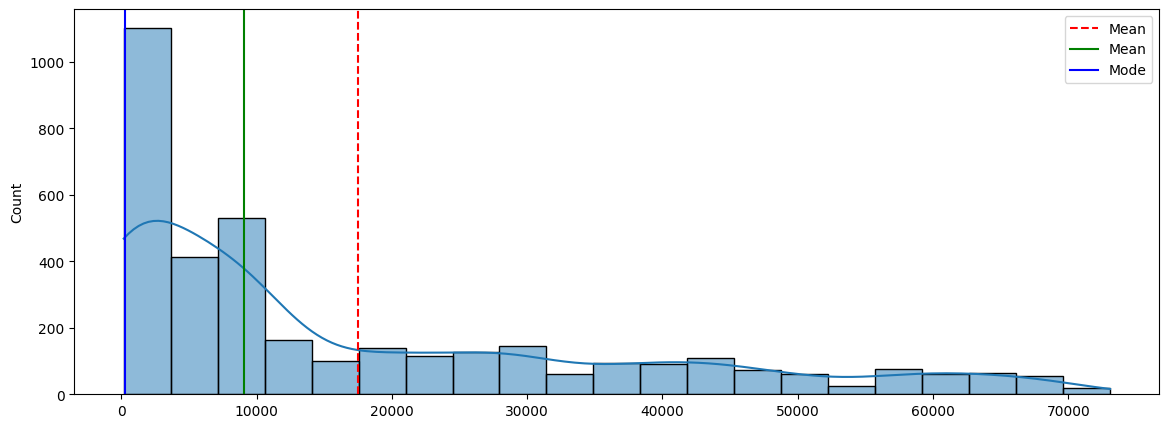

In [33]:
f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
# distribution of target values
v_dist_1 = target.values
# histogram plot
sns.histplot(v_dist_1, ax=ax1, kde=True)
# find the mean
mean=target.mean()
# find the median
median=target.median()
# find the mode
mode=target.mode().values[0]
# plot all of them together
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Mean")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")
ax1.legend()

ANALYSING TIME SERIES

In [34]:
import matplotlib.pyplot as plt
from statsmodels import api as sm

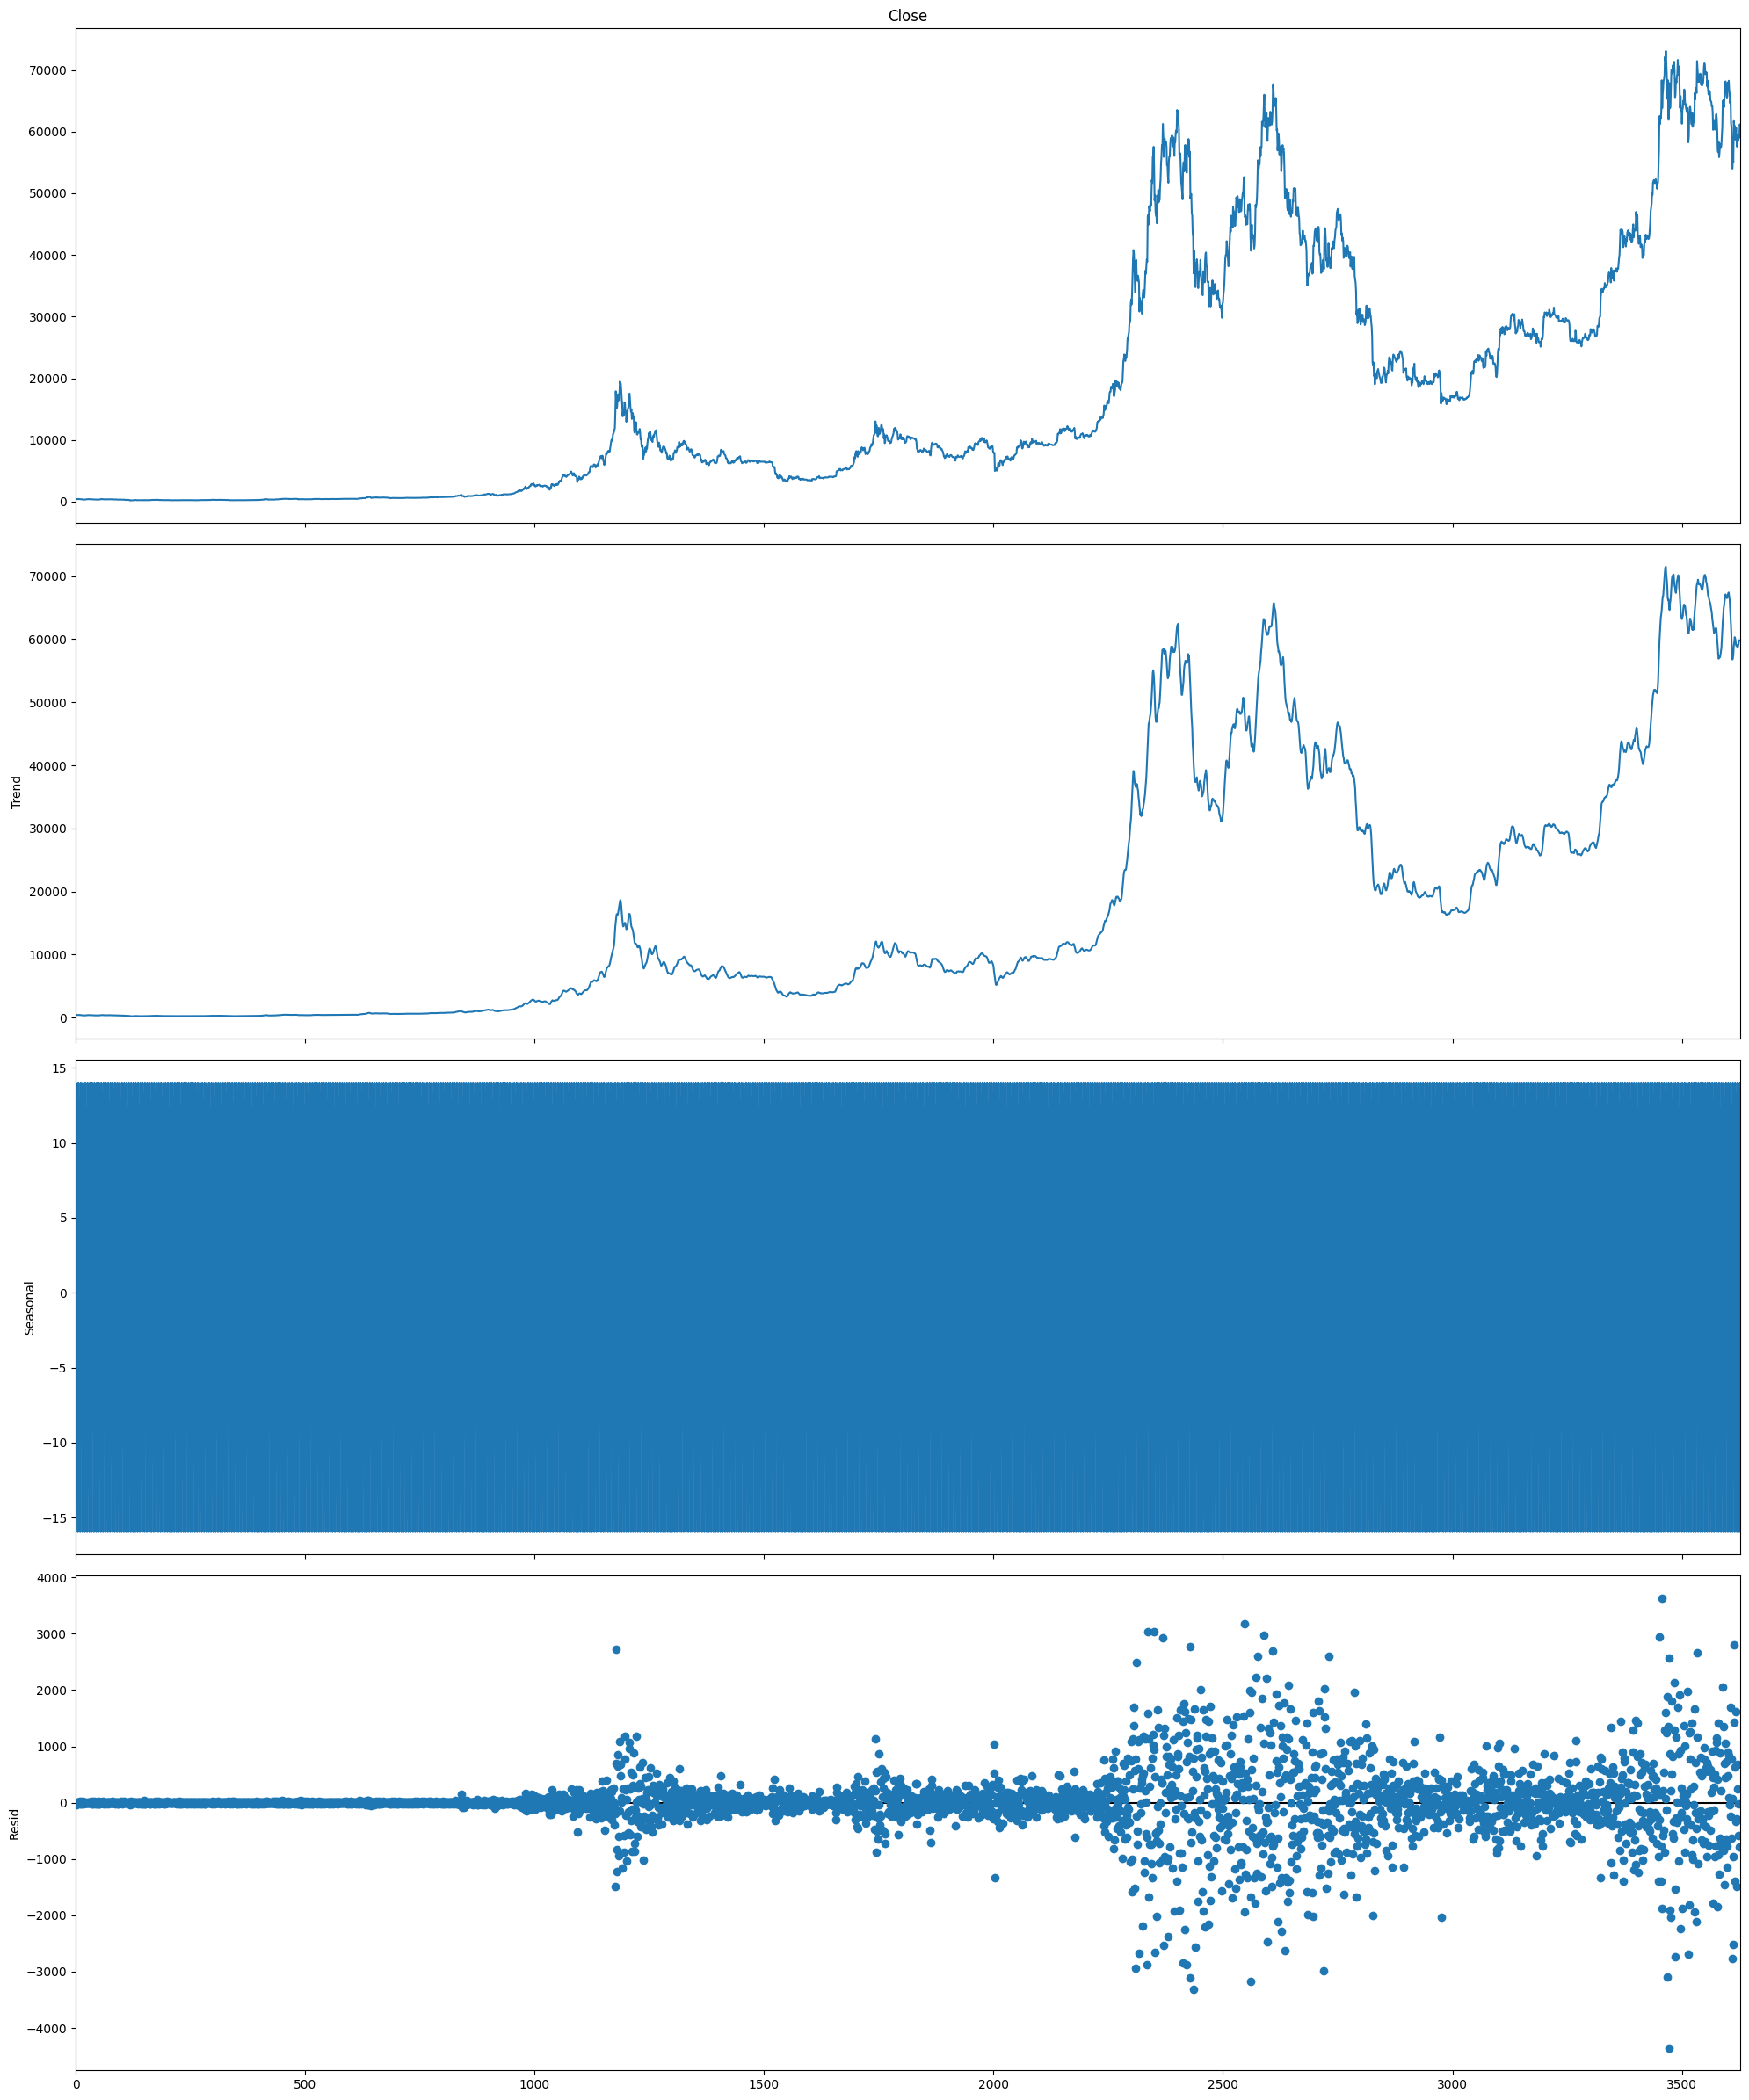

In [35]:
# Decompose and plot our close column time series

# Set the figure size using rcParams
plt.rcParams['figure.figsize'] = (20, 24)

# Decomposing close time series
dec = sm.tsa.seasonal_decompose(df['Close'], period=5, model='additive').plot()
plt.show()

Observations on stock close data :
1. We don't see a fixed pattern in the data
2. Seasonal plot shows a pattern indeed
3. Residual plot has lot of outliers towards the end 

DETECTING STATIONARITY IN TIME SERIES

ADF TEST FOR STATIONARITY

In [36]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=5).mean()
    MSTD = timeseries.rolling(window=5).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

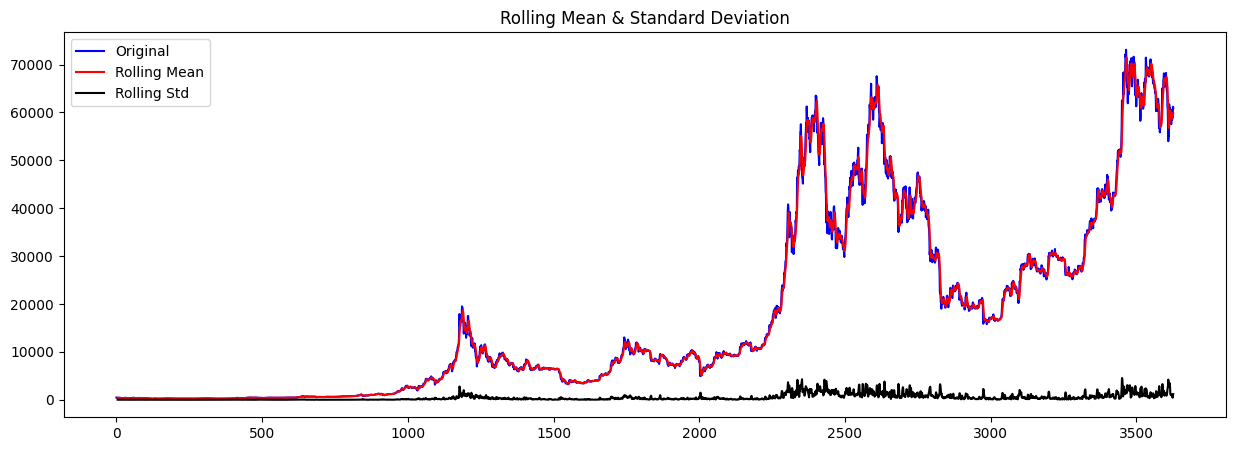

Results of Dickey-Fuller Test:
Test Statistic                   -1.007357
p-value                           0.750572
#Lags Used                       28.000000
Number of Observations Used    3599.000000
Critical Value (1%)              -3.432168
Critical Value (5%)              -2.862343
Critical Value (10%)             -2.567198
dtype: float64


In [37]:
test_stationarity(df['Close'])

As p-value = 0.75>0.05, so we conclude that data is not stationary

ACHIEVING STATIONARITY IN TIME SERIES

This can be achieved by pandas diff function

In [38]:
# lets first subset the data frame
data = df[['Date', 'Close']]
#  setting date as index
data = data.set_index('Date')

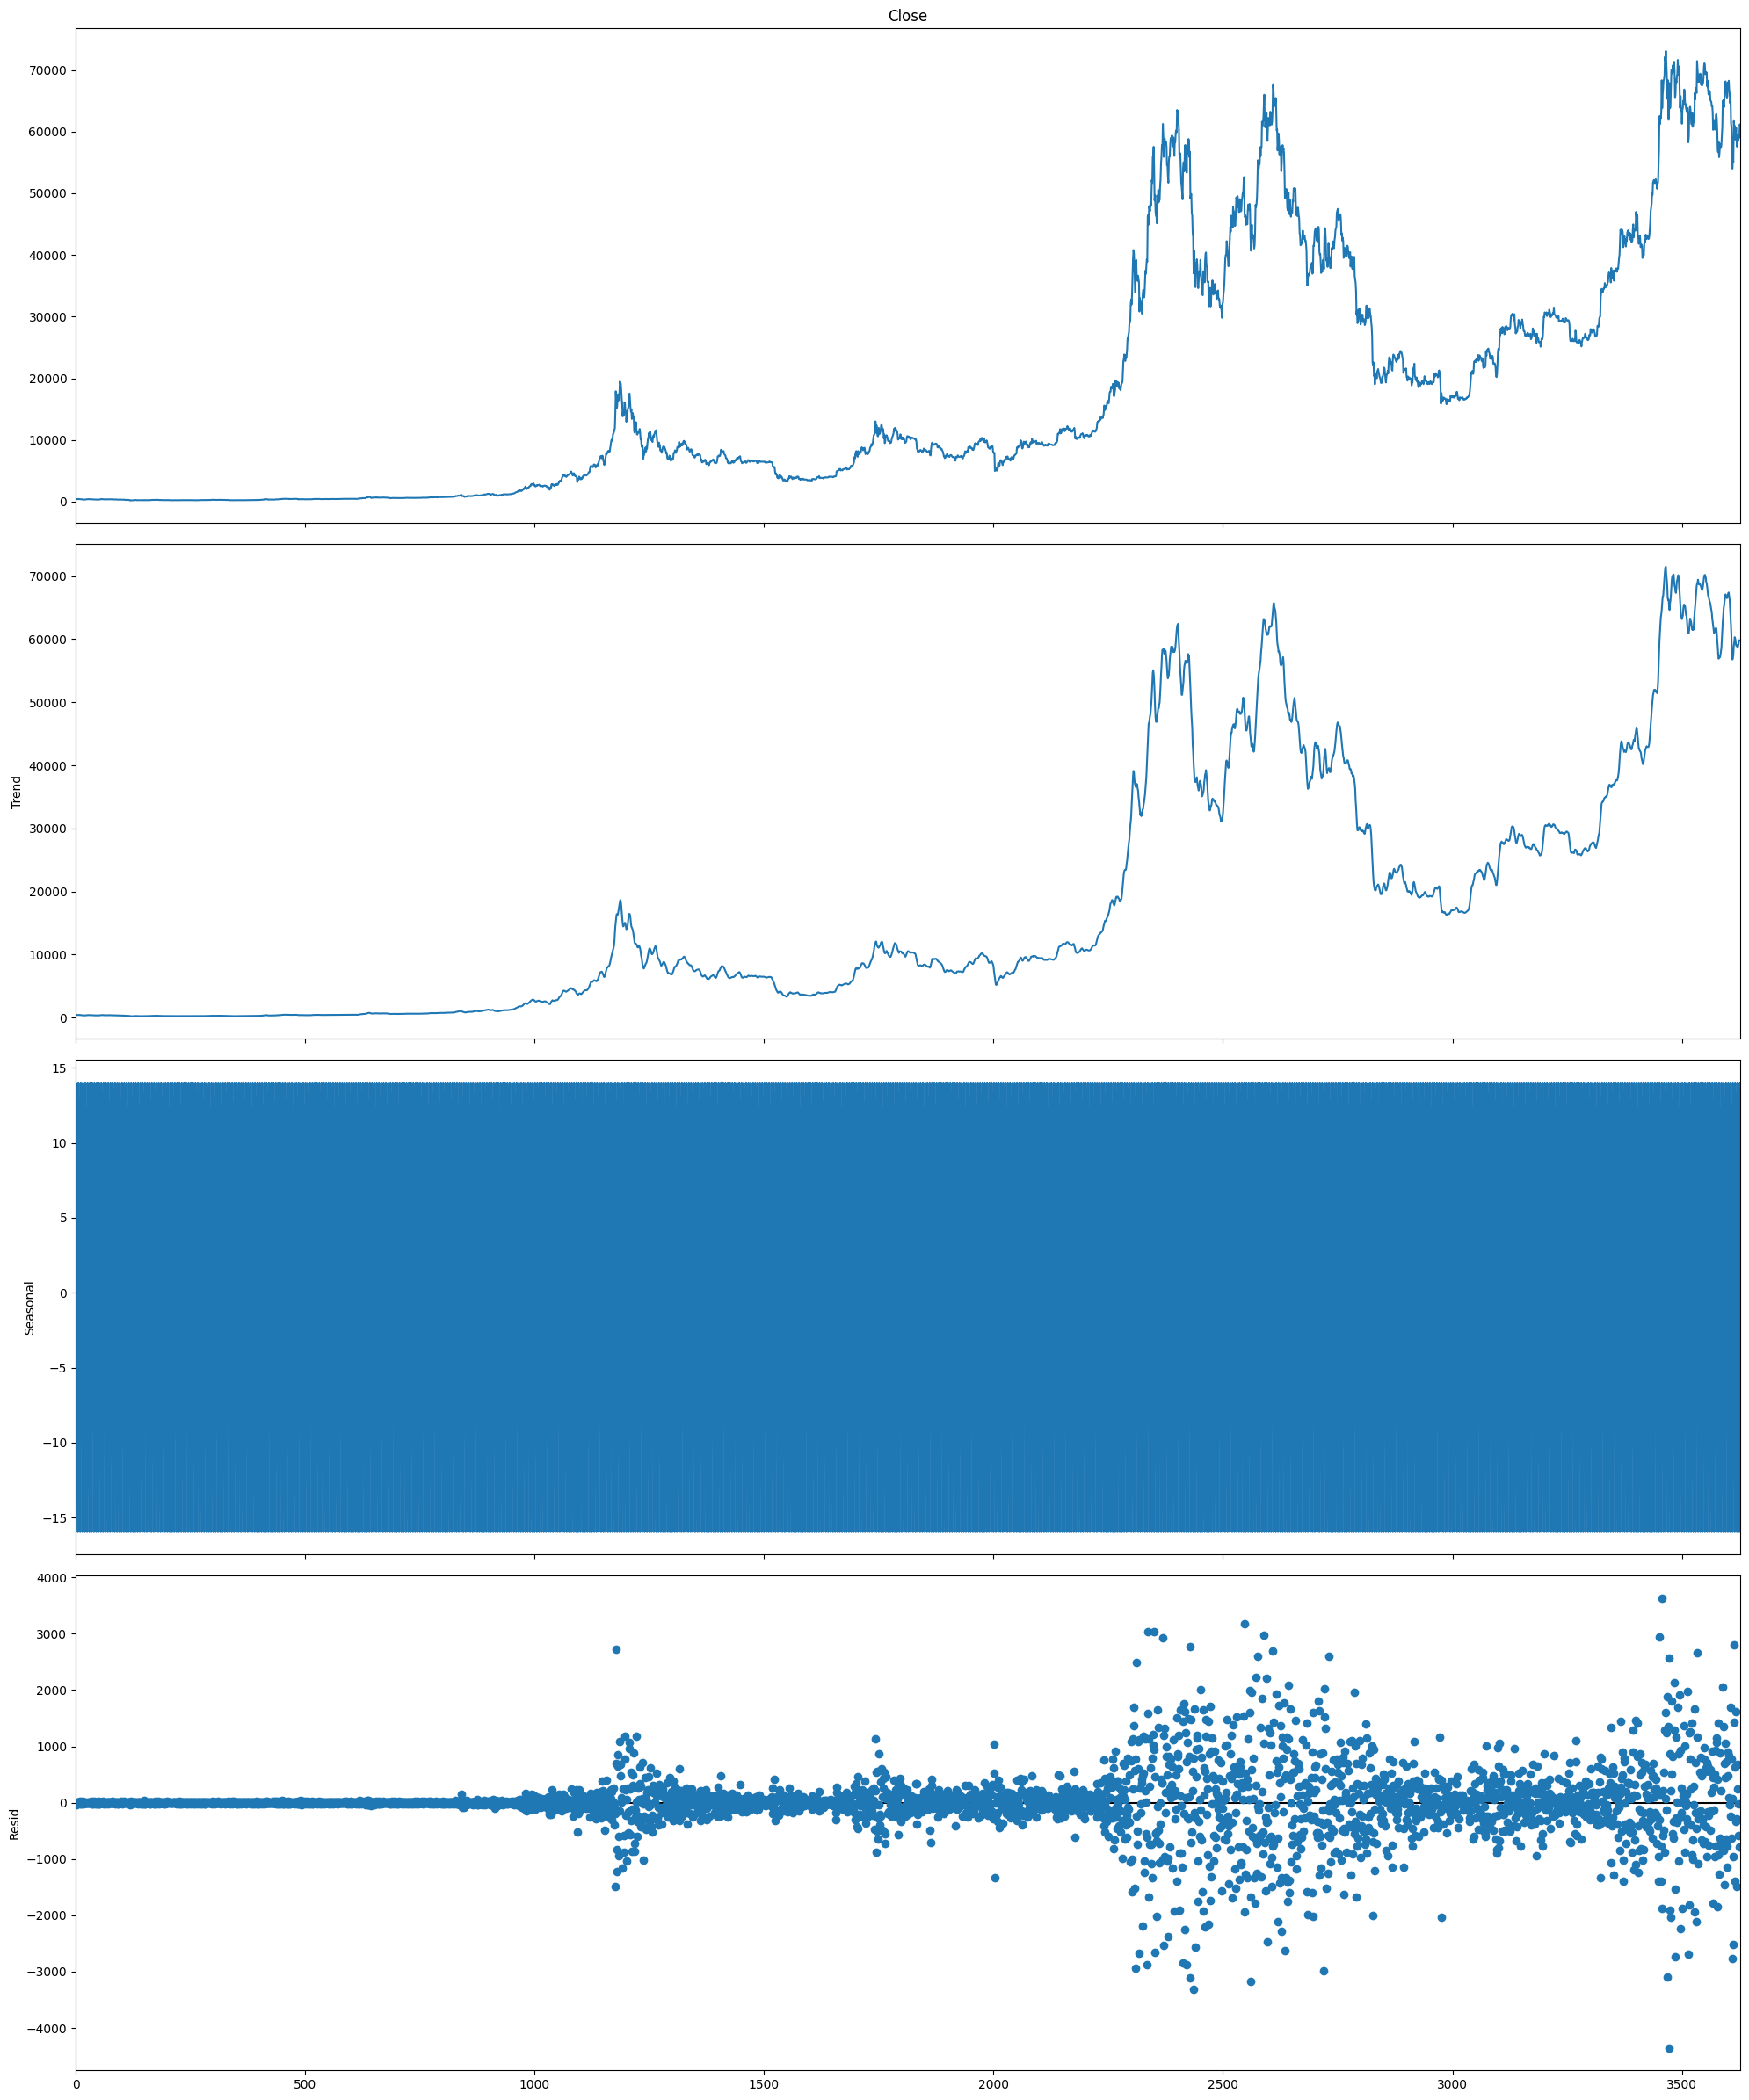

In [43]:
import matplotlib.pyplot as plt
from statsmodels import api as sm

# Set the figure size using rcParams
plt.rcParams['figure.figsize'] = (20, 24)

# Decomposing close time series
dec = sm.tsa.seasonal_decompose(df['Close'], period=5, model='additive').plot()
plt.show()

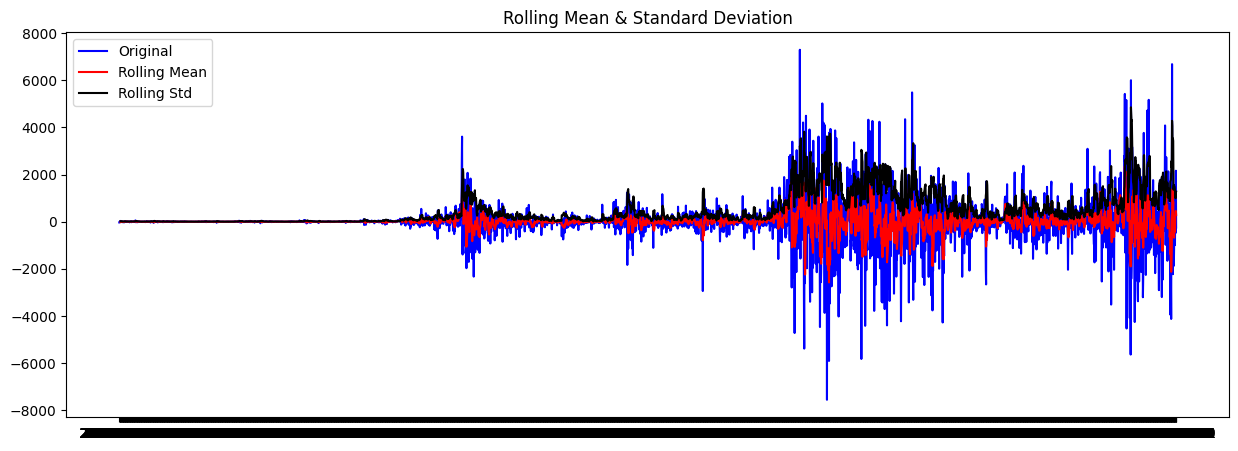

Results of Dickey-Fuller Test:
Test Statistic                -9.260616e+00
p-value                        1.410398e-15
#Lags Used                     3.000000e+01
Number of Observations Used    3.596000e+03
Critical Value (1%)           -3.432170e+00
Critical Value (5%)           -2.862344e+00
Critical Value (10%)          -2.567198e+00
dtype: float64


In [44]:
# Check for stationarity now with plots and test

test_stationarity(data_diff)

Because the p-value, 1.41e-16<0.05, so we conclude that data is stationary